In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [262]:
dff = pd.read_csv('Microsoft_Stock.csv')
dff.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [263]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [264]:
dff['Volume'].describe()

count    1.511000e+03
mean     3.019863e+07
std      1.425266e+07
min      1.016120e+05
25%      2.136213e+07
50%      2.662962e+07
75%      3.431962e+07
max      1.352271e+08
Name: Volume, dtype: float64

Check Outliers 

<Axes: xlabel='Volume'>

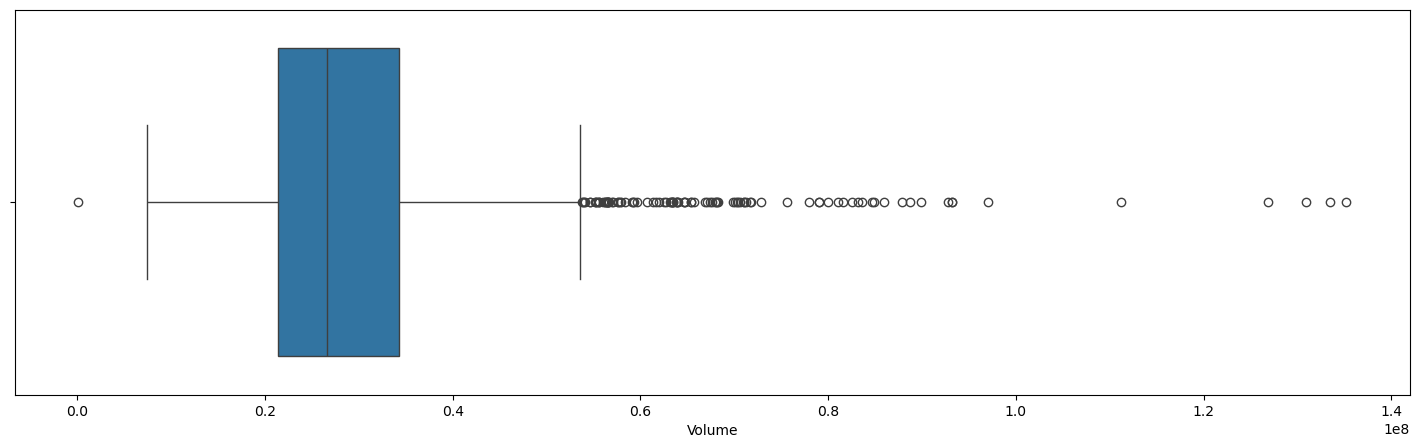

In [265]:
plt.subplots(figsize=(18,5))
sns.boxplot(data=dff,x='Volume')

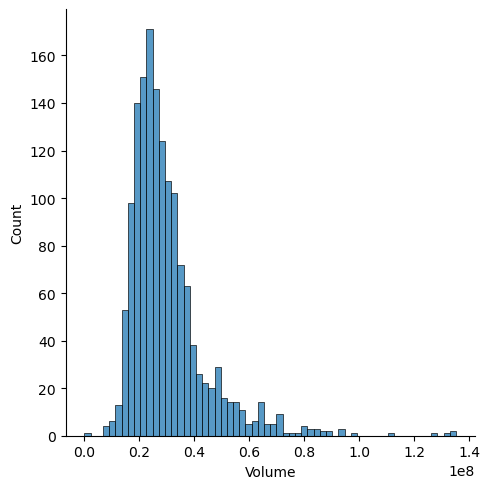

In [266]:
sns.displot(dff['Volume'])

Z-score method

In [267]:
# find limits
upper_limit = dff['Volume'].mean() + 3*dff['Volume'].std()
lower_limit = dff['Volume'].mean() - 3*dff['Volume'].std()
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)

upper limit :  72956602.34342377
lower limit :  -12559352.180617679


In [268]:
dff.shape[0] - dff[np.abs(dff["Volume"] - dff["Volume"].mean()) <= (2 * dff["Volume"].std())].shape[0]

71

In [269]:
df = dff[
    np.abs(dff["Volume"] - dff["Volume"].mean()) <= (dff["Volume"].std())
] 

In [270]:

print ("Shape Of The Before Ouliers: ",dff.shape)
print ("Shape Of The After Ouliers: ",df.shape)

Shape Of The Before Ouliers:  (1511, 6)
Shape Of The After Ouliers:  (1253, 6)


<Axes: xlabel='Volume'>

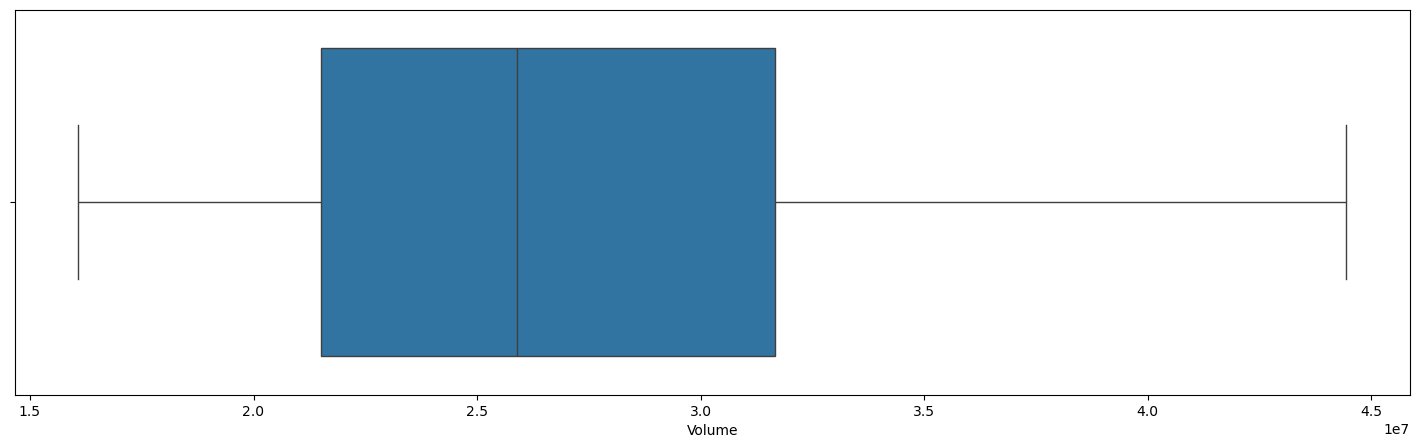

In [271]:
plt.subplots(figsize=(18,5))
sns.boxplot(data=df,x='Volume')

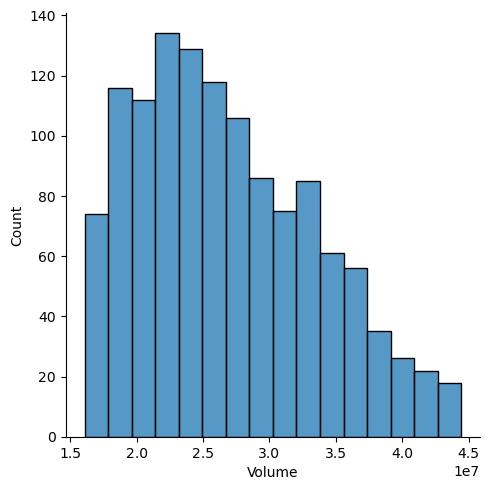

In [272]:
sns.displot(df['Volume'])

In [273]:
pd.to_datetime(df['Date'])

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: Date, Length: 1253, dtype: datetime64[ns]

In [274]:
pd.to_datetime(df['Date'],format='%m/%d/%Y %H:%M:%S')

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: Date, Length: 1253, dtype: datetime64[ns]

In [275]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y %H:%M:%S')
df['Date']

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: Date, Length: 1253, dtype: datetime64[ns]

In [276]:
df.loc[0,'Date'].day_name()

'Wednesday'

In [277]:
df['Date'].dt.day_name()

0       Wednesday
1        Thursday
2          Monday
3         Tuesday
4       Wednesday
          ...    
1506     Thursday
1507       Friday
1508       Monday
1509      Tuesday
1510    Wednesday
Name: Date, Length: 1253, dtype: object

In [278]:
df['Day'] = df['Date'].dt.day_name()

In [279]:
df.head()

,Date,Open,High,Low,Close,Volume,Day
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,Wednesday
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,Thursday
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,Monday
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,Tuesday
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,Wednesday


In [280]:
df['Date'].min()

Timestamp('2015-04-01 16:00:00')

In [281]:
df['Date'].max()

Timestamp('2021-03-31 16:00:00')

In [282]:
df['Date'].max()-df['Date'].min()

Timedelta('2191 days 00:00:00')

In [283]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume,Day
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,Wednesday
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,Thursday
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,Monday
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,Tuesday
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,Wednesday


In [284]:
df.loc['2021-02']['Close'].mean()

239.8211111111111

<Axes: xlabel='Date'>

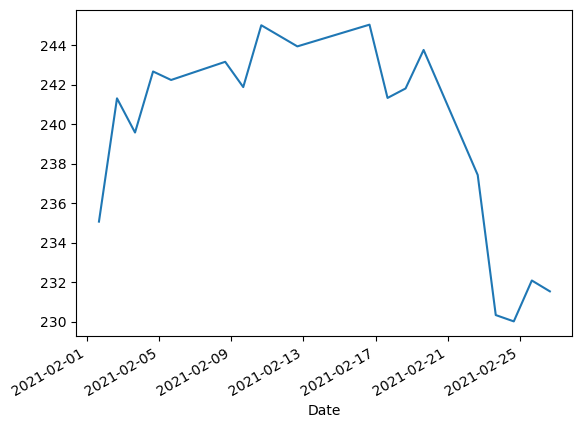

In [285]:
df.loc['2021-02']['Open'].plot()

Max of month

In [286]:
df['High'].resample('M').max()

Date
2015-04-30     43.15
2015-05-31     48.91
2015-06-30     47.77
2015-07-31     47.40
2015-08-31     48.41
               ...  
2020-11-30    228.12
2020-12-31    227.18
2021-01-31    238.02
2021-02-28    246.13
2021-03-31    241.05
Freq: ME, Name: High, Length: 72, dtype: float64

<Axes: xlabel='Date'>

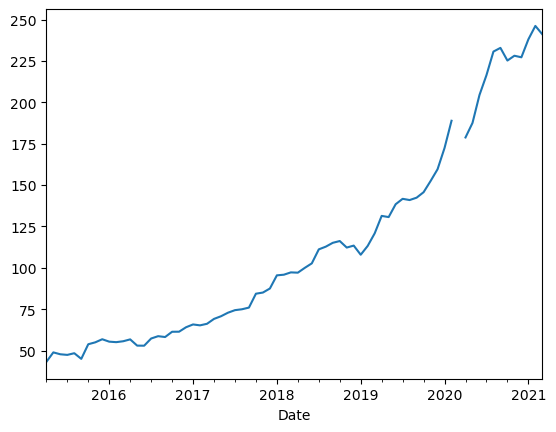

In [287]:
df['High'].resample('M').max().plot()

In [288]:
df.head()

,Open,High,Low,Close,Volume,Day
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,Wednesday
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,Thursday
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,Monday
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,Tuesday
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,Wednesday


In [289]:
df = df.reset_index(drop=True)

In [290]:
df.head()

,Open,High,Low,Close,Volume,Day
0,40.60,40.76,40.31,40.72,36865322,Wednesday
1,40.66,40.74,40.12,40.29,37487476,Thursday
2,40.34,41.78,40.18,41.55,39223692,Monday
3,41.61,41.91,41.31,41.53,28809375,Tuesday
4,41.48,41.69,41.04,41.42,24753438,Wednesday


In [291]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Volume_scaled'] = scaler.fit_transform(df[['Volume']])

In [292]:
df.head()

,Open,High,Low,Close,Volume,Day,Volume_scaled
0,40.60,40.76,40.31,40.72,36865322,Wednesday,1.480878
1,40.66,40.74,40.12,40.29,37487476,Thursday,1.573254
2,40.34,41.78,40.18,41.55,39223692,Monday,1.831041
3,41.61,41.91,41.31,41.53,28809375,Tuesday,0.284761
4,41.48,41.69,41.04,41.42,24753438,Wednesday,-0.317450


In [293]:
df = df.drop(columns='Volume',axis=1)
df.head()

,Open,High,Low,Close,Day,Volume_scaled
0,40.60,40.76,40.31,40.72,Wednesday,1.480878
1,40.66,40.74,40.12,40.29,Thursday,1.573254
2,40.34,41.78,40.18,41.55,Monday,1.831041
3,41.61,41.91,41.31,41.53,Tuesday,0.284761
4,41.48,41.69,41.04,41.42,Wednesday,-0.317450


<Axes: >

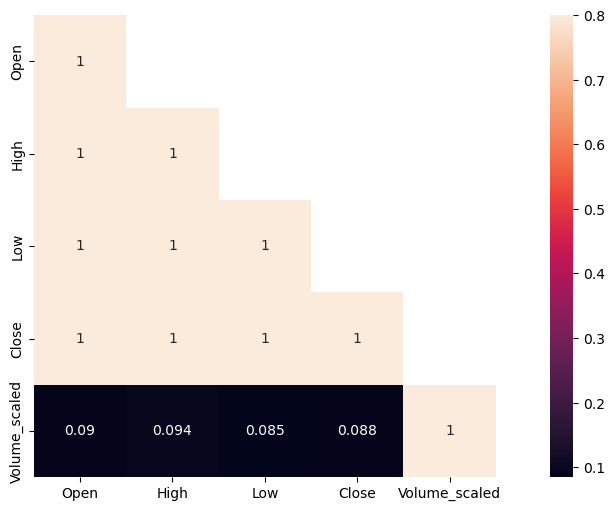

In [294]:
corrMatt = df.drop(columns="Day",axis=1).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(14,6)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<Axes: xlabel='Open', ylabel='Volume_scaled'>

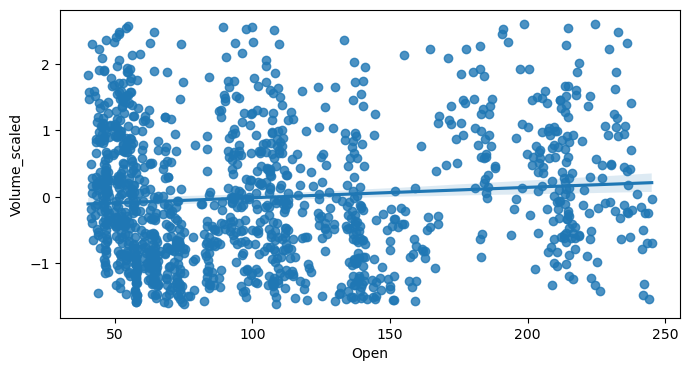

In [295]:
fig,ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.regplot(x="Open", y="Volume_scaled", data=df,ax=ax)


In [296]:
from sklearn.model_selection import train_test_split

In [297]:
x = df.iloc[:,:1]
y = df['Volume_scaled']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1234)

In [298]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(877, 1) (376, 1)
(877,) (376,)


In [299]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
reg = PolynomialFeatures(degree=4)

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_pred
'''

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\nreg = PolynomialFeatures(degree=4)\n\nreg.fit(x_train, y_train)\ny_pred = reg.predict(x_test)\ny_pred\n'

In [300]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=50)
reg.fit(x,y)
ridge_coeff = reg.coef_
ridge_intercept = reg.intercept_
y_pred = reg.predict(x_test)

In [301]:
'''
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy = "mean")

dummy_regr.fit(x_train, y_train)
y_pred = dummy_regr.predict(y_test)
'''

'\nfrom sklearn.dummy import DummyRegressor\n\ndummy_regr = DummyRegressor(strategy = "mean")\n\ndummy_regr.fit(x_train, y_train)\ny_pred = dummy_regr.predict(y_test)\n'

In [302]:
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics

print("R2: ", metrics.r2_score(y_test, y_pred))
print("MAE: ", mae(y_test, y_pred))
print("MSE: ", mse(y_test, y_pred))
print("RMSE: ", math.sqrt(mse(y_test, y_pred)))


R2:  0.026023263728289114
MAE:  0.8242232928597205
MSE:  0.9927092495378802
RMSE:  0.9963479560564573


In [303]:
reg.score(x_train,y_train)
#dummy_regr.score(x_train,y_train)

9.73959222843046e-05

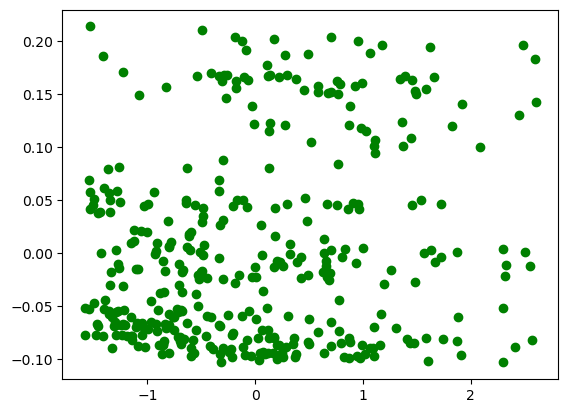

In [304]:
plt.scatter(y_test, y_pred, color='g')